# Table of content

<div class="alert alert-block alert-info" style="margin-top:20px">

1. [**Goals**](#1)<br>
2. [**Import Packages**](#2)<br>
3. [**About Data**](#3)<br>
   3.1[Fetching the Data](#4)<br>
   3.2[Check out the Data](#5)<br>
4. [**Exploratory Data Analysis(EDA)**](#6)<br>
5. [**Feature Engineering**](#7)<br>
6. [**linear Regression with one variable**](#8)<br>
   6.1[linear Regression with one variable, Manually](#9)<br>
   6.2[linear Regression with one variable, Scikit-learn](#10)<br>
7. [**Multiple Variable Linear Regression**](#11)<br>
   7.1[Multiple Variable Linear Regression, Manually](#12)<br>
   7.2[Multiple Variable Linear Regression, Sklearn](#13)<br>
8. [**References**](#14)<br>

</div>

# 1 Goals <a id=1></a>
****


# 2 Import Packages <a id=2></a>

In [1]:
import math, copy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# 3 About Dataset <a id = 2></a> 
__This dataset contains information about used cars.__

__This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.__

The columns in the given dataset are as follows:

    1- name
    2- year
    3- selling_price
    4- km_driven
    5- fuel
    6- seller_type
    7- transmission
    8- Owner



## 3.1 Fetching the Data <a id=3></a>
__*Using Pandas to load the dataset into this notebook. Using pandas
we can read our datafile (car data.csv) with the line below.
Data-set loaded will be assigned to the variable Car_data.*__

In [2]:
Car_data = pd.read_csv('car data.csv')

## 3.2 Check out the Data <a id=4></a>
__*We will run some exploratory analysis on our cardekho dataset now that it is loaded in the Car_data variable.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features. Let's Begin!*__

**_Looking at the above 5 rows of data we need to develop an understanding of every column to efficiently continue exploring the dataset further. We need to have a clear understanding of every feature defined in the data-set and what it is trying to convey!_**

In [3]:
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# check the number of row and columns
nRow, nCol = Car_data.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 301 rows and 9 columns


**_Let's check a concise summary of our dataframe printing columns' data-type,index data-type and number of non-null values !_**

In [5]:
Car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


**_Looking at the result of the above query it seems clear we have no missing/null values in our dataset!_**

__*Also, we can use `Car_data.isnull().sum()` to check missing/null values*__

**_Let's analyze our numerical columns which gives us the count,mean,std and other such values to have a clear idea of the values in our dataset. Helps in scaling!_**

In [6]:
Car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# 4 Exploratory Data Analysis(EDA) <a id=6></a>

**Let's check and Visualize the categorical data**

In [7]:
categorical_col = ['Fuel_Type' , 'Seller_Type', 'Transmission']
dis_cat = pd.DataFrame(Car_data[categorical_col].value_counts())

print(Car_data['Fuel_Type'].value_counts(), '\n',
      Car_data['Seller_Type'].value_counts(), '\n',
      Car_data['Transmission'].value_counts(),'\n')

dis_cat

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 
 Manual       261
Automatic     40
Name: Transmission, dtype: int64 



0
Fuel_Type Seller_Type Transmission     
Petrol    Dealer      Manual        116
          Individual  Manual         95
Diesel    Dealer      Manual         48
Petrol    Dealer      Automatic      18
Diesel    Dealer      Automatic      11
Petrol    Individual  Automatic      10
CNG       Dealer      Manual          2
Diesel    Individual  Automatic       1

**Let's examine the selling price respectively based on the types of :**
  - *owner*
  - *Transmission*
  - *Seller_Type*
  - *Fuel_Type*

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

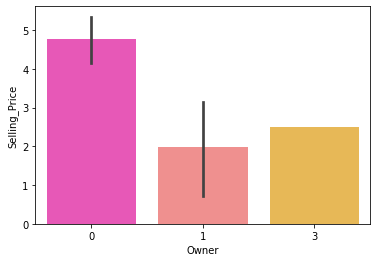

In [8]:
sns.barplot(x = 'Owner', y= 'Selling_Price', data = Car_data, palette= 'spring')

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

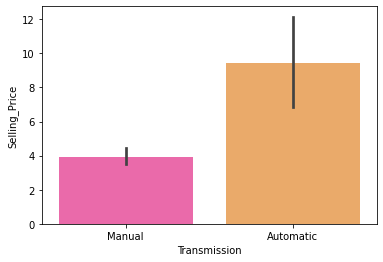

In [9]:
sns.barplot(x = 'Transmission', y= 'Selling_Price', data = Car_data, palette= 'spring')

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

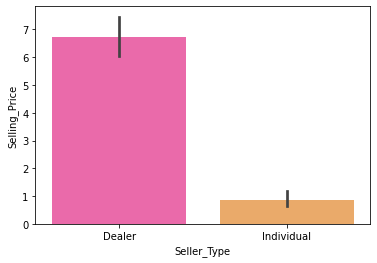

In [10]:
sns.barplot(x = 'Seller_Type', y= 'Selling_Price', data = Car_data, palette= 'spring')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

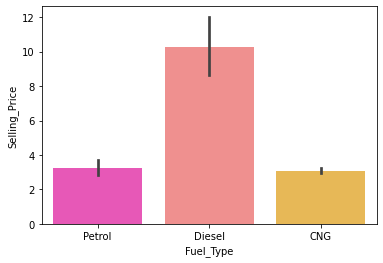

In [11]:
sns.barplot(x = 'Fuel_Type', y= 'Selling_Price', data = Car_data, palette= 'spring')

**As regards above, they seem:**
 - It seems that the vehicles belonging to owner 0 have the highest selling price.
 - automatic vehicles have a significant resale value compared to manual transmissions.
 - Dealers can sell vehicles at a higher selling price than a general individual. No surprises at all !
 - Diesel Engine Vehicles are found to have the highest selling price amongst Petrol and CNG engine vehicles.

**As well as that we can check the relations between the target variable [Selling price] and numerical features.**

It seems we can check the relation between the target variable and vehicle age, so let's add this feature to our data first and next check all links.

In [12]:
Car_data ["Vehicle_Age"] = max(Car_data['Year']) - Car_data['Year']
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,4


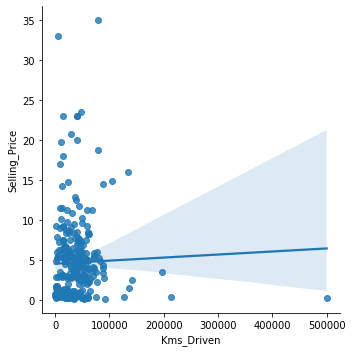

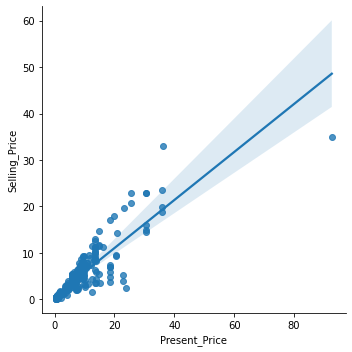

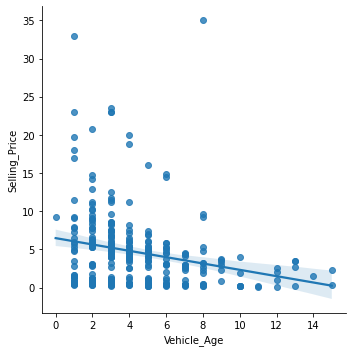

In [13]:
Numeric_feature = ['Kms_Driven', 'Present_Price', 'Vehicle_Age']
for i in range(3):
    sns.lmplot(x = Numeric_feature[i]  , y = 'Selling_Price', data = Car_data)

**According to the above plots:**
- The selling price is found to be higher for vehicles with less kms covered under the belt!
- Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.
- It seems the selling price decreases overall for older/ageing vehicles!

# 5 Feature Engineering<a id=7></a>

**We shall convert categorical features to numeric type and also drop out some unusable features**

In [14]:
# #using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
Car_data = pd.get_dummies(Car_data, columns=['Fuel_Type','Seller_Type', 'Transmission'], drop_first= True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
Car_data.drop(columns = ['Year'], inplace = True)

#let's check out data with new changes
Car_data.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,3.35,5.59,27000,0,4,0,1,0,1
1,sx4,4.75,9.54,43000,0,5,1,0,0,1
2,ciaz,7.25,9.85,6900,0,1,0,1,0,1
3,wagon r,2.85,4.15,5200,0,7,0,1,0,1
4,swift,4.60,6.87,42450,0,4,1,0,0,1


## 5.1 Understanding and Visualizing Correlations amongst the features

**Let's visualize distributions of individual numerical features, as well as correlations/relationships between numerical features.**

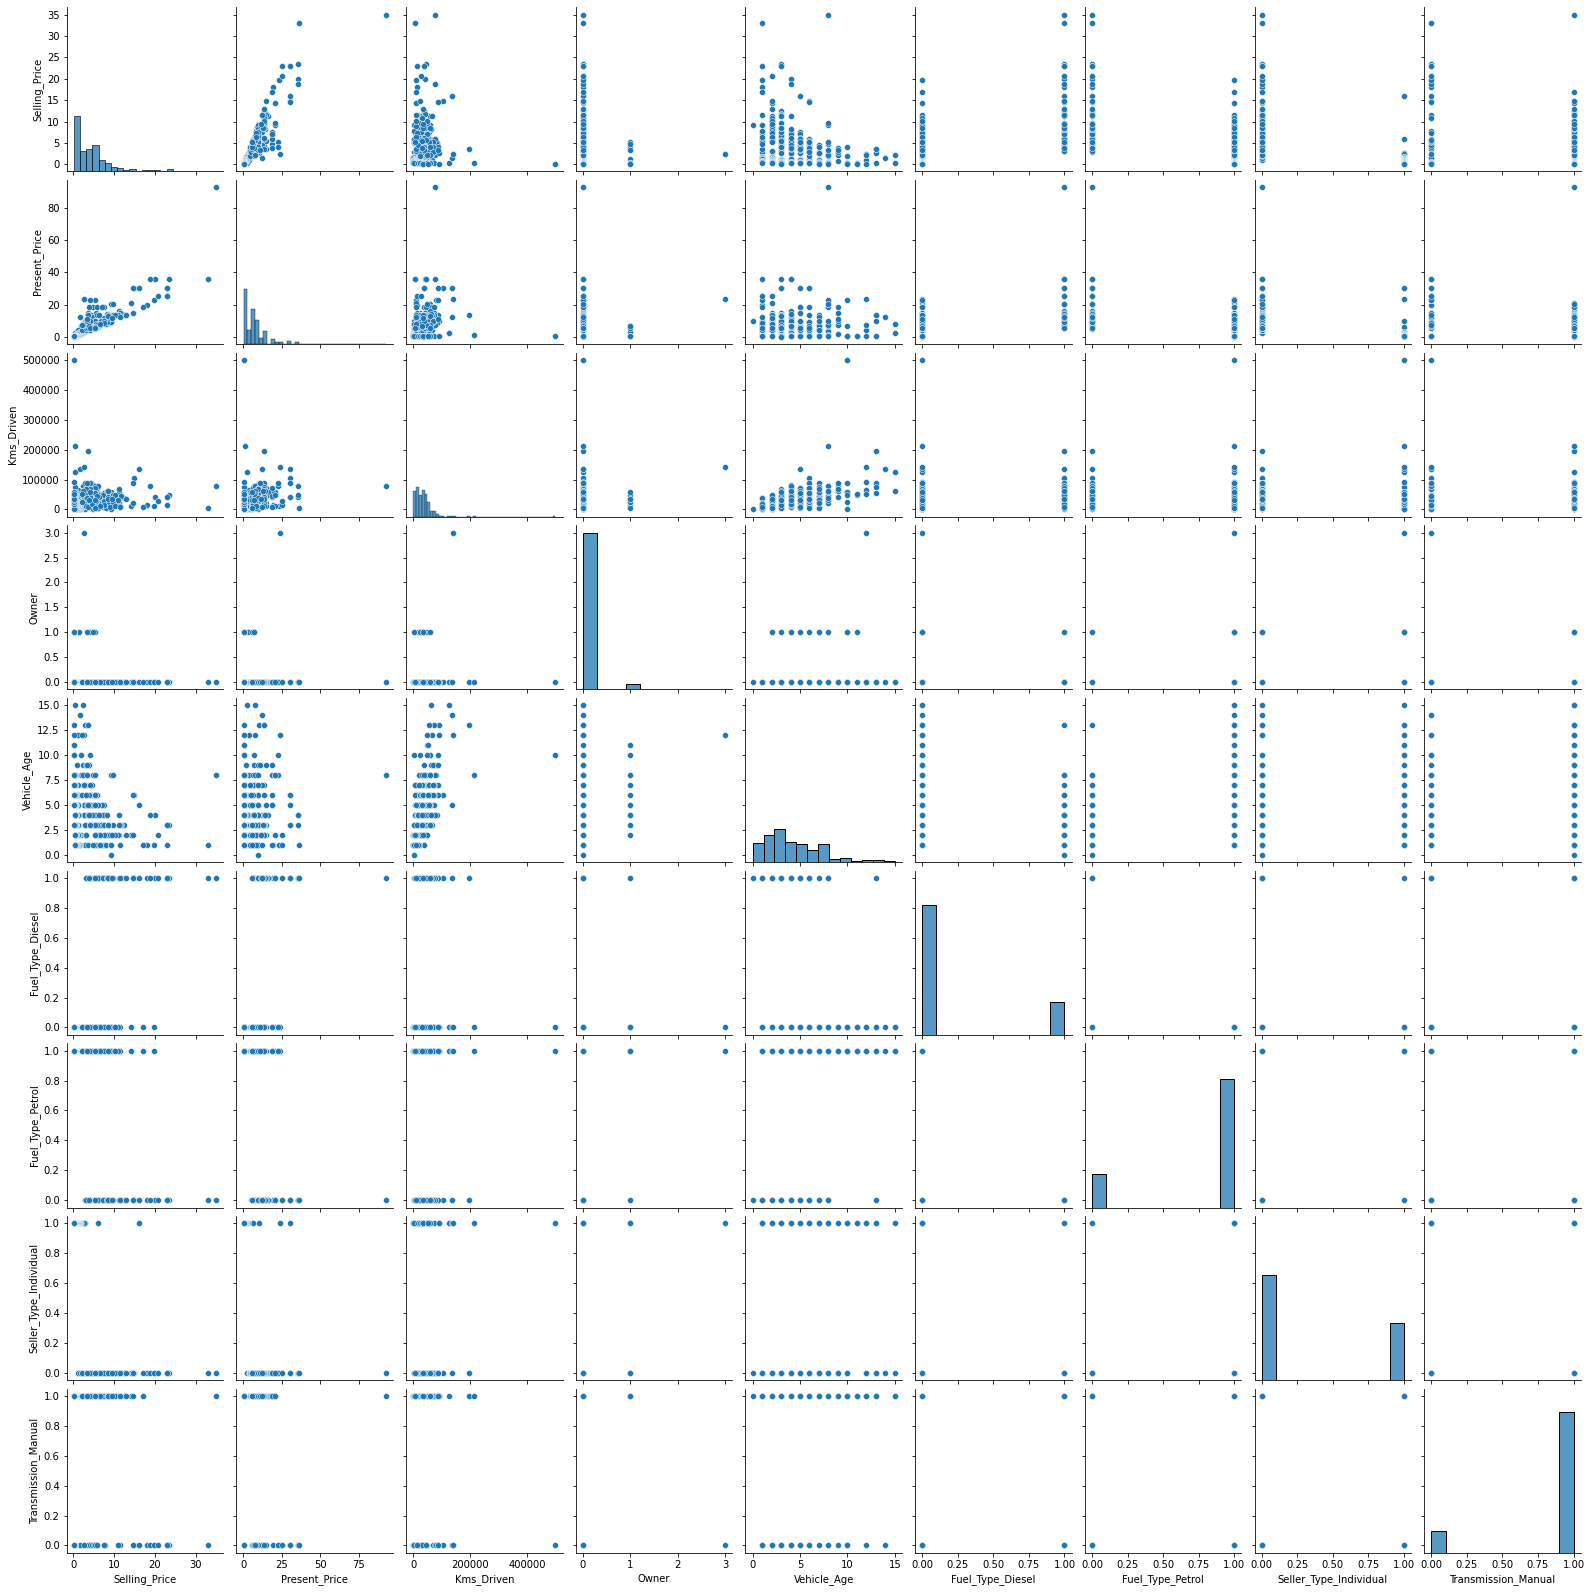

In [15]:
sns.pairplot(Car_data)

## 5.2 Correlation HeatMap

<AxesSubplot:>

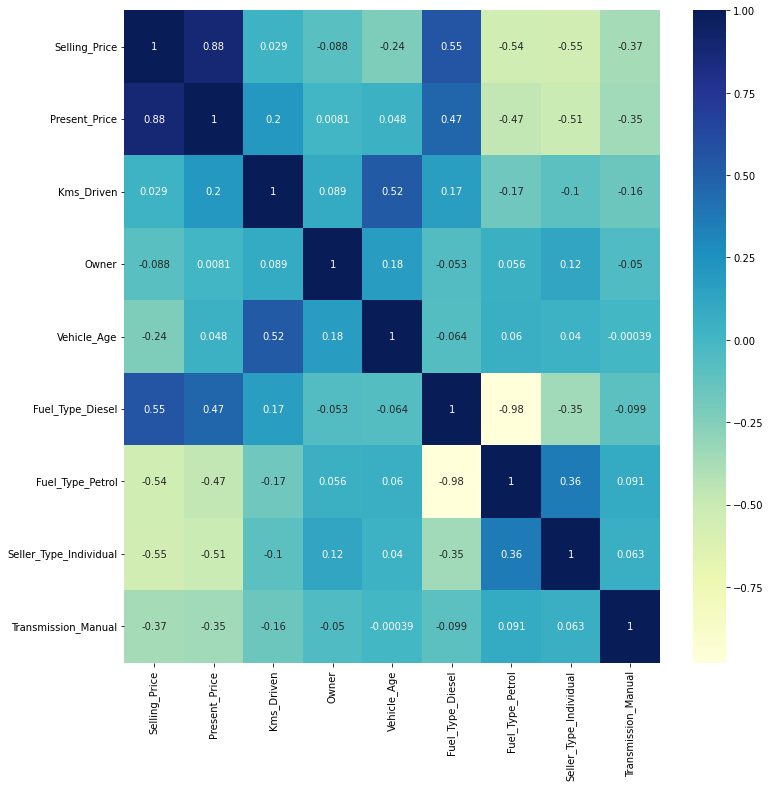

In [16]:
plt.figure(figsize=(12,12))
sns.heatmap(Car_data.corr(), annot = True, cmap="YlGnBu")

**Let's check boxplot of the target variable**

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff558ab33d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff558ab39a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff558ab3250>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff558ab3ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff558ac01f0>],
 'means': []}

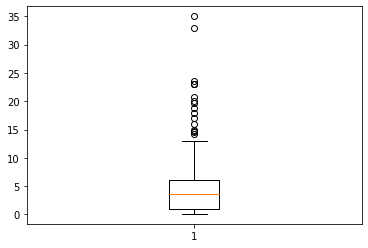

In [17]:
plt.boxplot(Car_data['Selling_Price'])

In [18]:
Car_data.corr()['Selling_Price']

Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
Vehicle_Age              -0.236141
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Transmission_Manual      -0.367128
Name: Selling_Price, dtype: float64

# 6 linear Regression with one variable <a id=8></a>

## 6.1 linear Regression with one variable, Manually <a id=9></a>

### 6.1.1 Notation <a id=1 ></a>

**Here is summary of Notation that are used in linear Regression Model.** 

|General <img width=77/> <br />  Notation  <img width=77/> | Description<img width=250/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets       | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


- **Choose feature and lable**
- **split data into train and test**

In [19]:
X = Car_data['Present_Price'].to_numpy()
Y = Car_data['Selling_Price'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(f'x_train.shape: {x_train.shape}, y_train.shape: {y_train.shape} ', '\n',
      f' Number of training example: {len(x_train)}, and Number of test example: {len(y_test)}')

x_train.shape: (240,), y_train.shape: (240,)  
  Number of training example: 240, and Number of test example: 61


Text(0.5, 0, 'Present_Price')

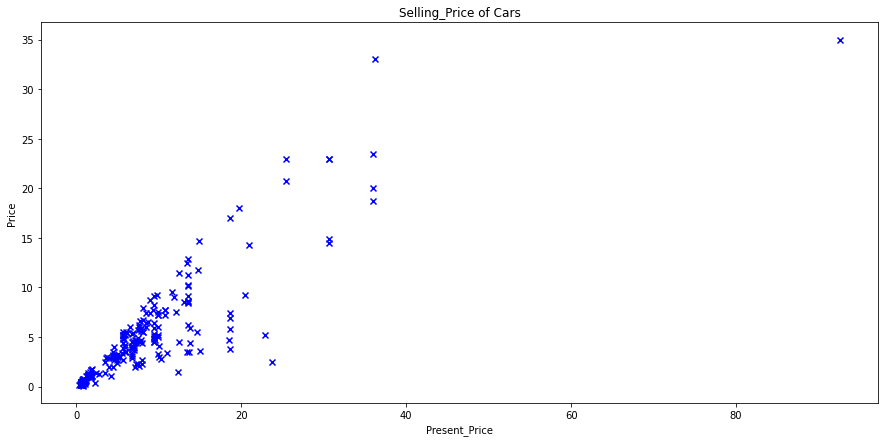

In [20]:
plt.figure(figsize=(15,7))
# Plot the data points
plt.scatter(x_train, y_train, marker = 'x', c='b')

# Set the title
plt.title("Selling_Price of Cars")

# Set the y-axis label
plt.ylabel('Price')

# Set the x-axis label
plt.xlabel('Present_Price')

### 6.1.2 Hypothesis Function 
The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how we can represent straight lines - different values of $w$ and $b$ give us different straight lines on the plot. <br/> <br/> <br/>
But how can we find the fit $w$ and $b$?
Let's define cost function


### 6.1.3 Computing Cost

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 1}^{m} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{2}$$ <br/>
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

To reduce cost function we use Gradient Descent

<a name="toc_40291_2.1"></a>
### 6.1.4 Gradient descent summary

In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training we measure the cost over all of our training samples $x^{(i)},y^{(i)}$<br/> <br/>


so *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


### 6.1.5 Linear Model Functions
**Let's define functions respectively**

In [21]:
def hypothesis(X, W, b):
    """
    calculate f_wb for all example
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns
      f_wb: (scalar)
    """
    f_wb = np.dot(X, W) + b
    return f_wb

In [22]:
def compute_cost(X, y, w, b, verbose=False):
    """
    Computes the gradient for linear regression
     Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns
      cost: (scalar)
    """
    m = X.shape[0]

    # calculate f_wb for all examples.
    error = hypothesis(X, w, b) - y
    # calculate cost
    total_cost = (1/(2*m)) * np.sum(error**2)

    if verbose: print("f_wb:")
    if verbose: print(f_wb)

    return total_cost

In [23]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns
      dj_dw (ndarray (n,1)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):        The gradient of the cost w.r.t. the parameter b.

    """
    m = X.shape[0]
    f_wb   = hypothesis(X, w, b)
    error  = f_wb - y
    dj_dw  = (1/m) * np.dot(error, X)
    dj_db  = (1/m) * np.sum(error)

    return dj_db,dj_dw

In [24]:
def Model_LR(x, y, w_in, b_in, alpha, num_iters):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,n)) : Data, m examples and n features
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    w = copy.deepcopy(w_in)   # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    param_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        
        db, dw = compute_gradient(x, y, w, b)
        
        #Update Parameters:
        w = w - alpha*dw
        b = b - alpha*db
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append(compute_cost(x, y, w, b))
            param_history.append([w,b])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dw: 0.3e}, dj_db: {db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
            
    return w, b, J_history, param_history #return w, b and J,param history for graphing
    

In [25]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.10e-3
# run gradient descent
w_final, b_final, J_hist, p_hist = Model_LR(x_train ,y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.87e+01  dj_dw: -7.848e+01, dj_db: -4.725e+00   w:  8.633e-02, b: 5.19704e-03
Iteration 1000: Cost 3.24e+00  dj_dw:  1.201e-02, dj_db: -2.184e-01   w:  5.307e-01, b: 3.64965e-01
Iteration 2000: Cost 3.21e+00  dj_dw:  6.406e-03, dj_db: -1.165e-01   w:  5.209e-01, b: 5.43319e-01
Iteration 3000: Cost 3.20e+00  dj_dw:  3.417e-03, dj_db: -6.217e-02   w:  5.157e-01, b: 6.38465e-01
Iteration 4000: Cost 3.20e+00  dj_dw:  1.823e-03, dj_db: -3.316e-02   w:  5.129e-01, b: 6.89222e-01
Iteration 5000: Cost 3.20e+00  dj_dw:  9.725e-04, dj_db: -1.769e-02   w:  5.114e-01, b: 7.16299e-01
Iteration 6000: Cost 3.20e+00  dj_dw:  5.188e-04, dj_db: -9.438e-03   w:  5.106e-01, b: 7.30743e-01
Iteration 7000: Cost 3.20e+00  dj_dw:  2.768e-04, dj_db: -5.035e-03   w:  5.102e-01, b: 7.38449e-01
Iteration 8000: Cost 3.20e+00  dj_dw:  1.476e-04, dj_db: -2.686e-03   w:  5.099e-01, b: 7.42560e-01
Iteration 9000: Cost 3.20e+00  dj_dw:  7.876e-05, dj_db: -1.433e-03   w:  5.098e-01, b: 7.44753e-01


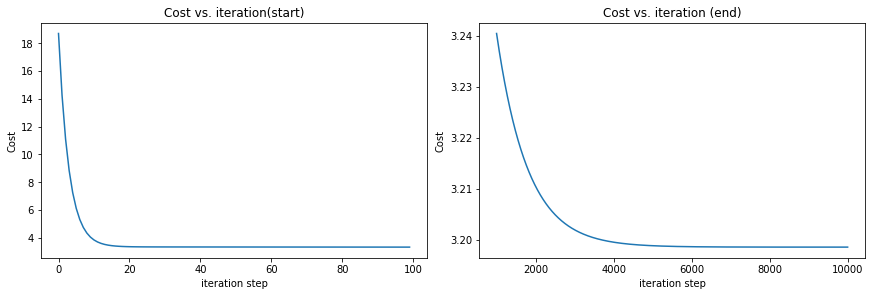

In [26]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

### 6.1.7 Manual Predicttion
**Let's predict test data with coefficient and intercept obtained**

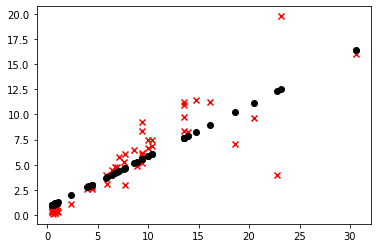

In [27]:
Y_hat = np.dot(w_final, x_test) + b_final
plt.scatter(x_test, y_test, marker= 'x' , c = 'r')
plt.scatter(x_test, Y_hat , marker= 'o' , c = 'k')

**It seems our model works well.**
for other features, we should change X and run the model again.

## 6.2 linear Regression with one variable, by scikit-learn<a id=10></a>

In order to train our model by scikit-learn we shall:
- from sklearn import linear_model
- set our Model to linear_model.LinearRegression() and so on.

Note that, we have to reshape our inpout and label to (m,1), becuase it has a single feature or array

### 6.2.1 Train Model

In [28]:
X_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

Model = LinearRegression()
Model.fit(X_train, y_train)
print(Model.coef_)
print(Model.intercept_)

[[0.50968993]]
[0.74726047]


As regards above, It seems we have succeeded to create a fit manually model, WELL DONE! :)

### 6.2.2 Predict Dada
Let's grab predictions off our test set and see how well it did!

In [29]:
X_test = x_test.reshape(-1,1)
Y_test = y_test.reshape(-1,1)
prediction = Model.predict(X_test)

Text(0.5, 0, 'Present Price')

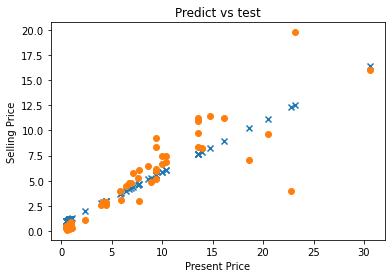

In [30]:
plt.scatter(X_test, prediction, marker = 'x')
plt.scatter(X_test, Y_test, marker= 'o')
plt.title('Predict vs test')
plt.ylabel('Selling Price')
plt.xlabel('Present Price')

# 7 Multiple Variable Linear Regression<a id=11></a>

## 7.1 Multiple Variable Linear Regression, Manually<a id=12></a>

### 7.1.1 Notation
Here is a summary of some of the notation we will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example maxtrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 


### 7.1.2 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples, and there are $n$ features, $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

### 7.1.3 Feature Scaling
#### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [31]:
def z_score_normalization(X):
    """
    computes X, Z score normalization by column
     Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    
    mu = np.mean(X, axis=0)      #find the mean of each feature
    
    sigma = np.std(X, axis=0)    #find the standard deviation of each feature
    
    x_norm = (X - mu)/ sigma
    
    return x_norm , mu, sigma

### 7.1.4 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter. 


### 7.1.5 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{6}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{7} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (7).



### 7.1.6 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{8}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{9} $$ 


In contrast to previous Model, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.



### 7.1.7 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{10}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{11}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{12}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

**Let's start!**


### 7.1.8 Define Functions and Train Model

In [32]:
# Let's check to figure out feature that need scaling
Car_data.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,4.372093,0.199336,0.794020,0.352159,0.867110
std,5.082812,8.644115,38886.883882,0.247915,2.891554,0.400166,0.405089,0.478439,0.340021
min,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.900000,1.200000,15000.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000
50%,3.600000,6.400000,32000.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000
75%,6.000000,9.900000,48767.000000,0.000000,6.000000,0.000000,1.000000,1.000000,1.000000
max,35.000000,92.600000,500000.000000,3.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# It seems 'Selling_Price','Present_Price','Kms_Driven','Vehicle_Age' normalized
var = ['Present_Price','Kms_Driven','Vehicle_Age']
Car_data_copy = copy.copy(Car_data)
Car_data_copy[var] , MU, Sigma = z_score_normalization(Car_data_copy[var])
Car_data_copy.tail()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
296,city,9.50,0.460214,-0.076225,0,-0.821718,1,0,0,1
297,brio,4.00,-0.200292,0.593804,0,-0.475308,0,1,0,1
298,city,3.35,0.390687,1.313340,0,1.603156,0,1,0,1
299,city,11.50,0.564504,-0.719876,0,-1.168129,1,0,0,1
300,brio,5.30,-0.200292,-0.810958,0,-0.821718,0,1,0,1


In [34]:
#let's specify inpouts and label

X = Car_data_copy.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = Car_data_copy['Selling_Price']

print(f' Inpouts shape: {X.shape}, label shape:{Y.shape}')

 Inpouts shape: (301, 8), label shape:(301,)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f' X_train shape:{X_train.shape}',
      f' Y_train shape:{Y_train.shape}', 
      f' X_test shape:{X_test.shape}',
      f' Y_test shape:{Y_test.shape}')

 X_train shape:(240, 8)  Y_train shape:(240,)  X_test shape:(61, 8)  Y_test shape:(61,)


In [36]:
def Model_Multiple_LR(x, y, w_in, b_in, alpha, num_iters):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,n)) : Data, m examples and n features
      y (ndarray (m,))  : target values
      w_in(ndarray(n,)) : initial vector of model parameters
      b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      
    Returns:
      w (vector): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    w = copy.deepcopy(w_in)   # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    param_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        
        db, dw = compute_gradient(x, y, w, b)
        
        #Update Parameters:
        w = w - alpha*dw
        b = b - alpha*db
        
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append(compute_cost(x, y, w, b))
            param_history.append([w,b])
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}")
            
            
    return w, b, J_history, param_history #return w, b and J,param history for graphing
    

In [37]:
w_init = np.zeros((X_train.shape[1]))
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.10e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = Model_Multiple_LR(X_train ,Y_train, w_init, b_init, tmp_alpha, iterations)
print(f"w found by gradient descent:{w_final}",'\n',
      f"b found by gradient descent:{b_final})")

Iteration    0: Cost 2.42e+01
Iteration 1000: Cost 1.73e+00
Iteration 2000: Cost 1.60e+00
Iteration 3000: Cost 1.57e+00
Iteration 4000: Cost 1.56e+00
Iteration 5000: Cost 1.56e+00
Iteration 6000: Cost 1.56e+00
Iteration 7000: Cost 1.56e+00
Iteration 8000: Cost 1.56e+00
Iteration 9000: Cost 1.56e+00
w found by gradient descent:[ 3.70030004 -0.22875709 -0.84671184 -1.17477556  3.36560484  1.20532312
 -1.07628365 -1.49657575] 
 b found by gradient descent:4.769442902611794)


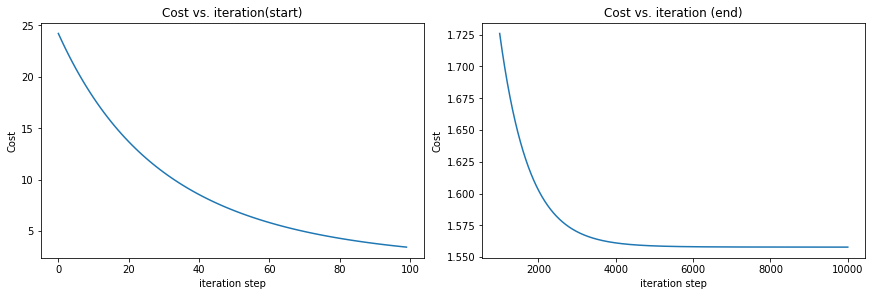

In [38]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [39]:
temp=Car_data_copy.drop(columns=['Car_Name','Selling_Price'])

coeff_df = pd.DataFrame(w_final,temp.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Present_Price,3.700300
Kms_Driven,-0.228757
Owner,-0.846712
Vehicle_Age,-1.174776
Fuel_Type_Diesel,3.365605
Fuel_Type_Petrol,1.205323
Seller_Type_Individual,-1.076284
Transmission_Manual,-1.496576


### 7.1.9 Prediction

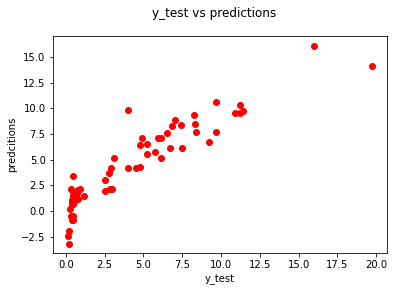

In [40]:
Y_hat = np.dot(X_test, w_final) + b_final

fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(Y_test,Y_hat, c='r')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

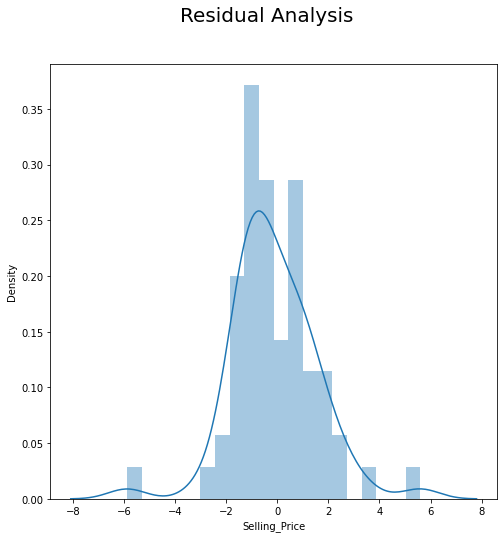

In [41]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((Y_test-Y_hat),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20) 

### 7.1.10 Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:

$$\frac {1}{n} \sum_{i=1}^n|y_i - \hat{y}_i| \tag{13}$$</br></br>
****Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i - \hat{y_i})^2 \tag{14}$$</br></br>

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}\tag{15}$$


- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [42]:
print(f' MAE is:{metrics.mean_absolute_error(Y_test, Y_hat)}', '\n',
      f'MSE is:{metrics.mean_squared_error(Y_test, Y_hat)}',  '\n',
      f'RMSE is: {np.square(metrics.mean_squared_error(Y_test, Y_hat))}')

 MAE is:1.254684829322519 
 MSE is:2.7607554071589098 
 RMSE is: 7.6217704181571575


In [43]:
print(f' R2_Score = {metrics.r2_score(Y_test, Y_hat)}')

 R2_Score = 0.8496851642383536


## 7.2 Multiple Variable Linear Regression, Sklearn<a id=13></a>

### 7.2.1 Scale/normalize the training data

In [44]:
X_to_Scale = Car_data.drop(columns=['Car_Name','Selling_Price'], axis=1)

feature_length = np.ptp(X_to_Scale, axis=0)
temp=Car_data_copy.drop(columns=['Car_Name','Selling_Price'])

Feature_range = pd.DataFrame(feature_length,temp.columns,columns=['Max-Min'])
Feature_range

,Max-Min
Present_Price,92.28
Kms_Driven,499500.00
Owner,3.00
Vehicle_Age,15.00
Fuel_Type_Diesel,1.00
Fuel_Type_Petrol,1.00
Seller_Type_Individual,1.00
Transmission_Manual,1.00


**As regards above, we should scale Present_Price, Kms_Driven, Vehicle_Age**

In [45]:
var = ['Present_Price','Kms_Driven','Vehicle_Age']
scaler = StandardScaler()

Car_data[var] = scaler.fit_transform(Car_data[var])

X_scaled = Car_data.drop(columns=['Car_Name','Selling_Price'], axis=1)
feature_length1 =np.ptp(X_scaled, axis=0)

temp=Car_data.drop(columns=['Car_Name','Selling_Price'])

#let's show the range of features befor and after feature scaling.
Feature_Range = pd.DataFrame([feature_length,feature_length1], columns=temp.columns)
Feature_Range

,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,92.280000,499500.000000,3.0,15.00000,1.0,1.0,1.0,1.0
1,10.693248,12.866338,3.0,5.19616,1.0,1.0,1.0,1.0


In [46]:
X = Car_data.drop(columns=['Car_Name','Selling_Price'], axis=1)
Y = Car_data['Selling_Price']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(f' X_Train shape:{X_Train.shape}',
      f' Y_Train shape:{Y_Train.shape}', 
      f' X_Test shape:{X_Test.shape}',
      f' Y_Test shape:{Y_Test.shape}')

 X_Train shape:(240, 8)  Y_Train shape:(240,)  X_Test shape:(61, 8)  Y_Test shape:(61,)


### 7.2.2 Train Model

In [47]:
Model_MLR = LinearRegression()
Model_MLR.fit(X_Train, Y_Train)

LinearRegression()

In [48]:
print(f'Intercept of best fit_line: {Model_MLR.intercept_}')

Intercept of best fit_line: 5.2812779522252296


In [49]:
temp = X = Car_data.drop(columns=['Car_Name','Selling_Price'])

Coeff_DF = pd.DataFrame(Model_MLR.coef_, temp.columns, columns=['Coefficient'])
Coeff_DF

,Coefficient
Present_Price,3.700460
Kms_Driven,-0.229951
Owner,-0.849010
Vehicle_Age,-1.173206
Fuel_Type_Diesel,2.860563
Fuel_Type_Petrol,0.703104
Seller_Type_Individual,-1.074773
Transmission_Manual,-1.508980


### 7.2.3 Predictions from our Model

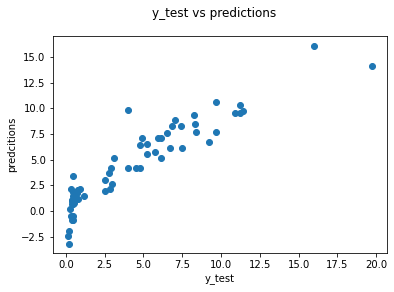

In [50]:
predictions=Model_MLR.predict(X_test)

fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(Y_Test,predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Residual Analysis')

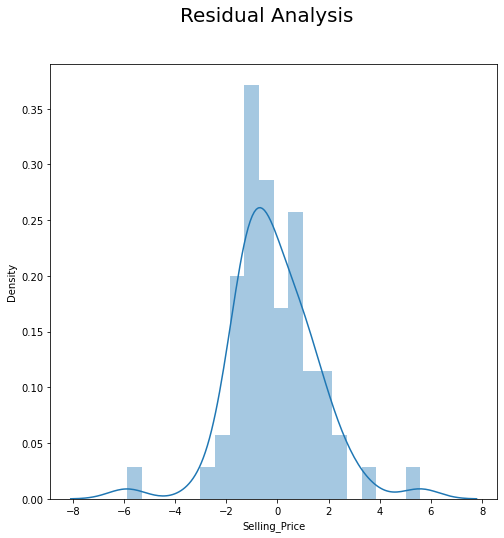

In [51]:
fig=plt.figure(figsize=(8,8))
sns.distplot((Y_Test-predictions),bins=20)
#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

### 7.2.4 Regression Evaluation Metrics

In [52]:
print(f' MAE is:{metrics.mean_absolute_error(Y_test, Y_hat)}', '\n',
      f'MSE is:{metrics.mean_squared_error(Y_test, Y_hat)}',  '\n',
      f'RMSE is: {np.square(metrics.mean_squared_error(Y_test, Y_hat))}')
print(f' R2_Score = {metrics.r2_score(Y_test, Y_hat)}')

 MAE is:1.254684829322519 
 MSE is:2.7607554071589098 
 RMSE is: 7.6217704181571575
 R2_Score = 0.8496851642383536


# 8 Reference<a id=14></a>

